In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import scipy.stats as stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


%matplotlib inline

In [2]:
#I am going to try rerun model one with Ridge and Lasso

In [3]:
pd.set_option('display.max_columns', 999)

In [4]:
#imported both data sets

In [5]:
train = pd.read_csv('../datasets/train_clean.csv')

In [6]:
test = pd.read_csv('../datasets/test_clean.csv')

In [7]:
features=['total_bsmt_sf','gr_liv_area', 'tot_bath', 'tot_outdoor_space','house_age','lot_area',
            'garage_cars']
X_train = train[features]
X_test = test[features]
y_train_overfit = train['saleprice']

In [8]:
#Create PolynomialFeatures

In [9]:
poly= PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

#instatiate a model

In [10]:
X_train_overfit = poly.fit_transform(X_train)
X_test_overfit = poly.fit_transform(X_test)

In [11]:
poly.get_feature_names(X_train.columns)

['total_bsmt_sf',
 'gr_liv_area',
 'tot_bath',
 'tot_outdoor_space',
 'house_age',
 'lot_area',
 'garage_cars',
 'total_bsmt_sf^2',
 'total_bsmt_sf gr_liv_area',
 'total_bsmt_sf tot_bath',
 'total_bsmt_sf tot_outdoor_space',
 'total_bsmt_sf house_age',
 'total_bsmt_sf lot_area',
 'total_bsmt_sf garage_cars',
 'gr_liv_area^2',
 'gr_liv_area tot_bath',
 'gr_liv_area tot_outdoor_space',
 'gr_liv_area house_age',
 'gr_liv_area lot_area',
 'gr_liv_area garage_cars',
 'tot_bath^2',
 'tot_bath tot_outdoor_space',
 'tot_bath house_age',
 'tot_bath lot_area',
 'tot_bath garage_cars',
 'tot_outdoor_space^2',
 'tot_outdoor_space house_age',
 'tot_outdoor_space lot_area',
 'tot_outdoor_space garage_cars',
 'house_age^2',
 'house_age lot_area',
 'house_age garage_cars',
 'lot_area^2',
 'lot_area garage_cars',
 'garage_cars^2']

In [12]:
X_train_overfit.shape

(2051, 35)

In [13]:
X_test_overfit.shape

(879, 35)

In [14]:
ss_overfit = StandardScaler()

In [15]:
lr=LinearRegression()

In [16]:
lr.fit(X_train_overfit, y_train_overfit)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
predictions = lr.predict(X_train_overfit)
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

In [18]:
r2_score(y_train_overfit, predictions)

0.8353993514418915

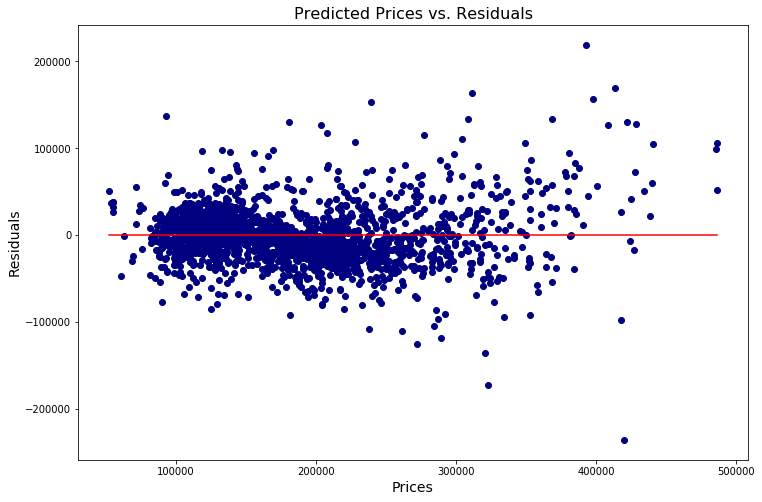

In [19]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [20]:
#create Ridge Model

In [21]:
ridge_mod = Ridge(alpha=10)

In [22]:
ridge_mod.fit(X_train_overfit, y_train_overfit)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.70104e-20): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
ridge_predictions = ridge_mod.predict(X_train_overfit)

In [24]:
r2_score(y_train_overfit, ridge_predictions)

0.8353497314712952

In [25]:
r_alph = np.logspace(0, 10, 200)

In [26]:
ridge_mod = RidgeCV(alphas=r_alph, scoring='r2', cv=5)

In [27]:
ridge_mod = ridge_mod.fit(X_train_overfit, y_train_overfit)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.67504e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.25999e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.68094e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.06074e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.72759e-20): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.31087e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.00267e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.97798e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.48694e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.99619e-20): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.9337e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.61605e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.92704e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.67735e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.69486e-20): result may not be accurate.
  overwrite_a=True

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.04137e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.97524e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.13787e-20): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.86125e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.28672e-20): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.10072e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.24644e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.3123e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.8729e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.36099e-19): result may not be accurate.
  overwrite_a=True)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.45818e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.36009e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.63891e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.36114e-19): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.69865e-19): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.5102e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.61133e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.22066e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.67959e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.60992e-18): result may not be accurate.
  overwrite_a=True

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.9605e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.44526e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.24105e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.49834e-18): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.8745e-18): result may not be accurate.
  overwrite_a=True)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.90304e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.99157e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.12814e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.22045e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.13909e-17): result may not be accurate.
  overwrite_a=Tru

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.79311e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.09389e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.5999e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.92733e-17): result may not be accurate.
  overwrite_a=True).T
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.63212e-17): result may not be accurate.
  overwrite_a=True

In [28]:
ridge_mod.alpha_

114.89510001873097

In [29]:
y_train_ridge_pred = ridge_mod.predict(X_train_overfit)
y_test_ridge_pred = ridge_mod.predict(X_test_overfit)

In [30]:
r2_score(y_train_overfit, y_train_ridge_pred)

0.8349502062476177

In [31]:
predictions = y_train_ridge_pred
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

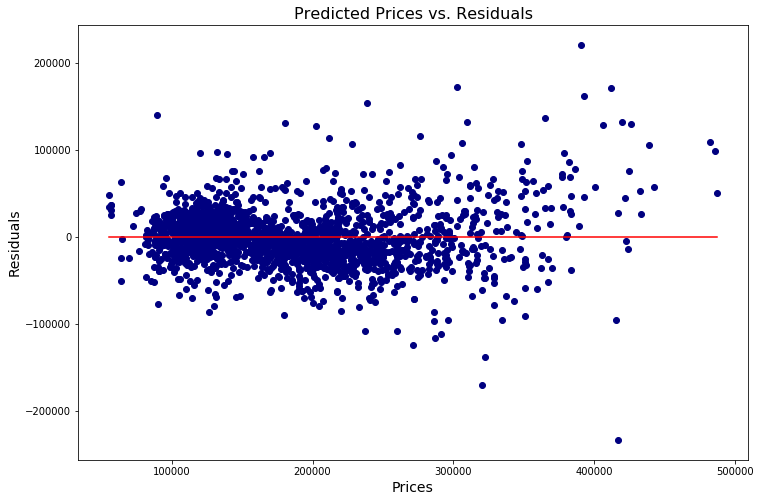

In [32]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [33]:
#create Lasso model

In [34]:
las_alph = np.logspace(-3, 0, 100)

In [35]:
las_mod = LassoCV(alphas=las_alph, cv=5)

In [36]:
las_mod = las_mod.fit(X_train_overfit, y_train_overfit)

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarni

/Users/jerelnovick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [37]:
# Generate predictions
y_train_las_pred = las_mod.predict(X_train_overfit)
y_test_las_pred = las_mod.predict(X_test_overfit)

# Evaluate model.
print(r2_score(y_train_overfit, y_train_las_pred))

0.8353991763458531


In [38]:
las_mod.alpha_

0.8697490026177834

In [39]:
r2_score(y_train_overfit, y_train_ridge_pred)

0.8349502062476177

In [40]:
predictions = y_train_las_pred
train['predictions'] = predictions
residuals = train['saleprice'] - train['predictions']

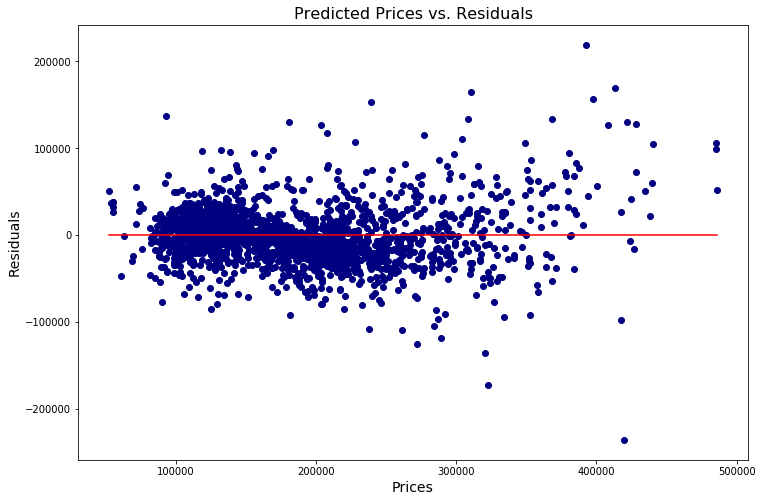

In [41]:
plt.figure(figsize = (12,8))
plt.scatter(train['predictions'],(residuals),c='navy');
plt.title('Predicted Prices vs. Residuals', size=16)
plt.xlabel('Prices', size=14)
plt.ylabel('Residuals', size=14);
plt.plot((np.min(train['predictions']), np.max(train['predictions'])),
         (np.mean(residuals), np.mean(residuals)),
         color='r');

In [42]:
ridge_mod.coef_

array([ 6.10402070e+01,  2.89081941e+01,  1.49637769e+03,  8.52585476e+00,
        6.13264070e+02,  2.42003966e+00, -2.50492063e+03, -2.32108295e-02,
       -2.61271384e-02,  2.61413795e+01,  4.97053485e-03, -7.10523279e-01,
        2.65016220e-04,  1.80866036e+01,  7.98607645e-06,  1.41940076e+01,
        1.20534108e-04,  8.26305211e-02, -5.86474918e-04,  1.50845658e+01,
       -5.27070998e+03, -8.40071263e+00, -2.37344847e+02,  1.35006510e-01,
       -5.43368975e+03, -2.88025494e-02,  1.25443430e-01, -8.55695306e-04,
        3.13232806e+01,  1.57672788e+00, -1.44202061e-02, -1.57224654e+02,
       -4.27937349e-06, -1.32790076e-02, -3.84785329e+03])

In [43]:
las_mod.coef_

array([ 5.93072659e+01,  1.99767741e+01,  1.38499843e+04,  1.03268083e+01,
        6.70867635e+02,  2.54662323e+00, -9.38025696e+03, -2.27357874e-02,
       -2.56439861e-02,  2.40408524e+01,  3.78852497e-03, -6.92633124e-01,
        2.97696074e-04,  2.04031296e+01, -1.38885733e-03,  1.68847389e+01,
       -2.32159439e-03,  1.46024461e-01, -5.63527094e-04,  1.74987422e+01,
       -6.84699573e+03, -6.77767902e+00, -3.20048773e+02,  6.53765566e-02,
       -7.00135649e+03, -2.86203618e-02,  1.13119204e-01, -8.60174714e-04,
        3.12030011e+01,  1.25533867e+00, -1.55407000e-02, -1.25303025e+02,
       -4.33069498e-06, -5.43463406e-03, -3.15432917e+03])

In [44]:
#created a new dataframe for me submission 

In [45]:
submission = pd.DataFrame(columns=[])

In [46]:
#assigned data to dataframe

In [47]:
#submission = pd.DataFrame(columns=[test['id']
submission['Id'] = test['id']
submission['SalePrice'] = y_test_ridge_pred

In [48]:
y_test_las_pred

array([144930.43882302, 216101.77965955, 189413.63654691, 111271.15389401,
       178346.32751544, 104774.42840743, 111732.43480643, 143821.5465799 ,
       188405.86051121, 182342.26137456, 174343.50559769, 110837.43289251,
       137458.73215096, 319402.59684306, 137105.48897483, 110969.75233782,
       140801.52389816, 125387.38160054, 212996.63980796, 138434.39685174,
       136571.25255414, 121058.82930908, 236931.96707592, 157716.9922186 ,
       185335.5377054 , 105844.73140812, 141875.85742716, 152444.13466673,
       129449.02436325,  81234.59623268, 105820.77299444, 119388.58129074,
       260731.41100829, 164378.38615607, 224795.9659325 , 170769.86664335,
       112207.52677161,  82952.88641673,  91380.3632115 , 207447.47402416,
       145161.57963547, 219000.82015211, 142331.46968195, 143912.94268359,
       217422.18368371, 108034.44076701, 220222.58795126, 124316.04938759,
       115545.98278046, 130284.98937155, 117906.06555349, 155741.79594063,
       263964.96402939, 1

In [49]:
submission.to_csv('../submissions/submission_six.csv',index=False)

In [50]:
submission['SalePrice'] = y_test_las_pred

In [51]:
submission.to_csv('../submissions/submission_seven.csv',index=False)